# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#List for holding weather parameters
city_name = []
lat = []
lng = []
temperature = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
#counts the record of cities
counter = 1

#main url being used to access data
url = "https://api.openweathermap.org/data/2.5/weather?"

#print statement to show initiation of the script
print("Beginning Data Retrieval")
print("-----------------------------")

#loop through the cities and append data to the lists previously made
for city in cities:
    
#using a try statement that will attempt to get the city information, but will skip over any that are missing
    try:
        response = requests.get(f'{url}q={city}&units=imperial&appid={weather_api_key}').json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f'Processing Record {counter} | {city}')

#Increase counter with each iteration
        counter +=1
#Avoid exceeding the API call limit
        time.sleep(1.1)
#if city is not found, then print a statment saying such then go back to the beginning of the loop with "continue"
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | punta arenas
Processing Record 2 | goderich
Processing Record 3 | sumbe
Processing Record 4 | chapais
Processing Record 5 | sitka
Processing Record 6 | aripuana
Processing Record 7 | qaanaaq
Processing Record 8 | uarini
Processing Record 9 | keuruu
Processing Record 10 | port hardy
Processing Record 11 | nanortalik
Processing Record 12 | varazdin
Processing Record 13 | kingsport
City not found. Skipping...
Processing Record 14 | busselton
Processing Record 15 | saint-philippe
Processing Record 16 | port blair
Processing Record 17 | rikitea
Processing Record 18 | pisco
Processing Record 19 | mataura
Processing Record 20 | carnarvon
Processing Record 21 | ancud
Processing Record 22 | mercedes
Processing Record 23 | saskylakh
Processing Record 24 | guabito
Processing Record 25 | harper
Processing Record 26 | kruisfontein
Processing Record 27 | batemans bay
Processing Record 28 | vaini
City not found. Skipping...


Processing Record 230 | kloulklubed
Processing Record 231 | general roca
Processing Record 232 | bobo dioulasso
Processing Record 233 | veraval
Processing Record 234 | dunedin
Processing Record 235 | steti
Processing Record 236 | mayo
Processing Record 237 | quatre cocos
Processing Record 238 | uhlove
Processing Record 239 | port hedland
Processing Record 240 | mastic beach
Processing Record 241 | baherden
Processing Record 242 | burnie
Processing Record 243 | hanyang
Processing Record 244 | berlevag
Processing Record 245 | longyearbyen
Processing Record 246 | belaya gora
Processing Record 247 | lagoa
Processing Record 248 | pangoa
Processing Record 249 | batamshinskiy
Processing Record 250 | hammerfest
Processing Record 251 | todos santos
Processing Record 252 | sisophon
Processing Record 253 | saint-pierre
Processing Record 254 | pacific grove
Processing Record 255 | oksfjord
Processing Record 256 | requena
Processing Record 257 | bakel
Processing Record 258 | hobyo
Processing Record

Processing Record 461 | necochea
Processing Record 462 | yingcheng
Processing Record 463 | srandakan
Processing Record 464 | ouadda
Processing Record 465 | sakaiminato
Processing Record 466 | nsanje
Processing Record 467 | northam
Processing Record 468 | saint-georges
Processing Record 469 | iqaluit
Processing Record 470 | maltahohe
Processing Record 471 | husavik
Processing Record 472 | sur
Processing Record 473 | gannan
Processing Record 474 | san ignacio
Processing Record 475 | george
City not found. Skipping...
Processing Record 476 | san rafael
Processing Record 477 | mustafakemalpasa
Processing Record 478 | sakaraha
Processing Record 479 | shakawe
Processing Record 480 | beyla
Processing Record 481 | terrace bay
Processing Record 482 | port lincoln
Processing Record 483 | garowe
Processing Record 484 | chililabombwe
Processing Record 485 | los llanos de aridane
Processing Record 486 | huadian
Processing Record 487 | san jose
Processing Record 488 | newport
Processing Record 489 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#create weather dictionary to be turned into a dataframe
weather = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather)
weather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.91,50,40,42.57,CL,1662743287
1,Goderich,43.7501,-81.7165,74.91,56,0,9.04,CA,1662743288
2,Sumbe,-11.2061,13.8437,72.37,84,33,6.58,AO,1662743290
3,Chapais,49.7834,-74.8492,77.67,38,71,12.50,CA,1662743292
4,Sitka,57.0531,-135.3300,57.09,82,100,4.61,US,1662743293


In [16]:
#data export to a csv file
weather_df.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#max humidity is 100% prior to any editing, thus no additional cleaning is needed
weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,18.103647,20.163141,68.667952,68.620112,53.067039,8.266574,1.662744e+09
std,33.710416,90.625931,16.061645,22.404711,39.427375,5.650349,2.688713e+02
min,-54.800000,-179.166700,33.040000,4.000000,0.000000,0.000000,1.662743e+09
25%,-10.166700,-57.873800,55.020000,58.000000,11.000000,4.160000,1.662743e+09
50%,19.216700,22.461700,72.280000,73.000000,57.000000,6.910000,1.662744e+09
75%,47.914700,102.134700,80.010000,86.000000,95.000000,11.030000,1.662744e+09
max,78.218600,178.416700,105.890000,100.000000,100.000000,42.570000,1.662744e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
    This graph shows the relationship between maximum daily temperature and latitude. It shows that there may be a relationship between how close one is to the equator and a maximum temperature.

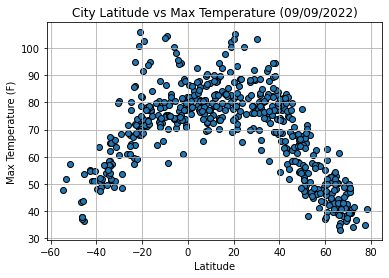

In [26]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"],edgecolor = "black")
plt.title("City Latitude vs Max Temperature (09/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Latitude vs Max Temperature (F).png")

## Latitude vs. Humidity Plot
    This graph shows humidity vs latitude with values appearing to be skewed slightly to the right (higher latitude values).

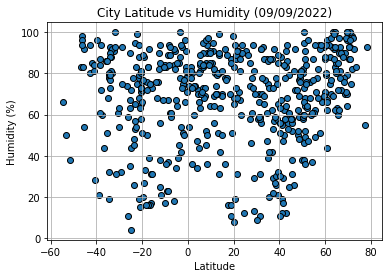

In [27]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"],edgecolor = "black")
plt.title("City Latitude vs Humidity (09/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Latitude vs Humidity (%).png")

## Latitude vs. Cloudiness Plot
    This graph shows latitude vs cloudiness. The cloudiness values seem to range from 0 to 100% regardless of their relationship to the equator.

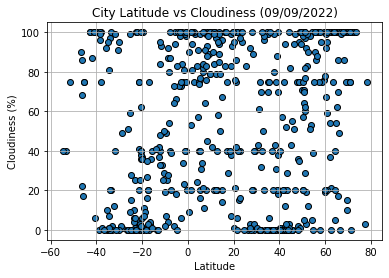

In [29]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"],edgecolor = "black")
plt.title("City Latitude vs Cloudiness (09/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Latitude vs Cloudiness (%).png")

## Latitude vs. Wind Speed Plot
    With the exception of an obvious outlier, wind speeds appear to be below 20mph and very condensed.

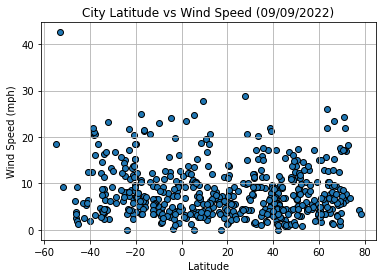

In [30]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"],edgecolor = "black")
plt.title("City Latitude vs Wind Speed (09/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Latitude vs Wind Speed (mph).png")

## Linear Regression

In [31]:
#Divide the data into northern hemisphere and southern hemisphere
north_hem_df = weather_df.loc[weather_df["Latitude"]>=0]
south_hem_df = weather_df.loc[weather_df["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8144988291057729


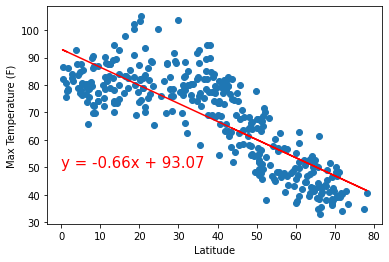

In [63]:
plt.scatter(north_hem_df["Latitude"], north_hem_df["Max Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Max Temperature"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')
plt.savefig("Northern Hemisphere - Max Temp vs Latitude.png")

This graph shows that as you move in a northerly direction, the maximum temperature decreases at a rate of 0.66 degrees per latitude coordinate. There is a clear negative correlation based on the r-value as well. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.731366865783399


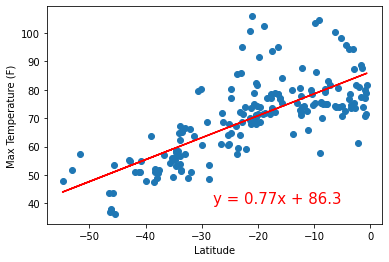

In [64]:
plt.scatter(south_hem_df["Latitude"], south_hem_df["Max Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Max Temperature"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(-28,40),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.savefig("Southern Hemisphere - Max Temp vs Latitude.png")

This graph shows a positive correlation based on the r-value of 0.73. As one approaches the equator from a negative latitude coordinate, the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14214066795071817


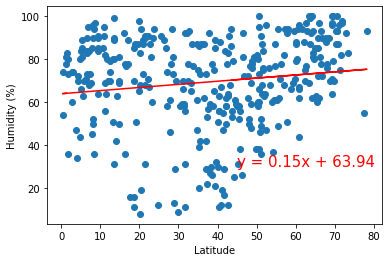

In [65]:
plt.scatter(north_hem_df["Latitude"], north_hem_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Humidity"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.savefig("Northern Hemisphere - Humidity vs Latitude.png")

This graph does not show much of any correlation based on a low r-value.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.060125407404422765


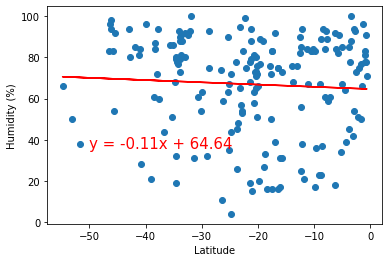

In [66]:
plt.scatter(south_hem_df["Latitude"], south_hem_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Humidity"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(-50,36),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.savefig("Southern Hemisphere - Humidity vs Latitude.png")

There is no clear correlation in relation to the humidity and distance from the equator. The r-value is extremely small, meaning that correlation cannot be determined in this case.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05540815412586147


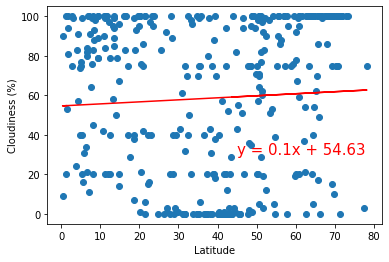

In [67]:
plt.scatter(north_hem_df["Latitude"], north_hem_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Cloudiness"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.savefig("Northern Hemisphere - Cloudiness vs Latitude.png")

This graph does not indicate a correlation between cloudiness and distance to the equator in the northern hemisphere. With a slope near 0 and a y-intercept of 54.63, one can assume that it is a 50% chance of being fully cloudy or having a clear sky.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07924680521497499


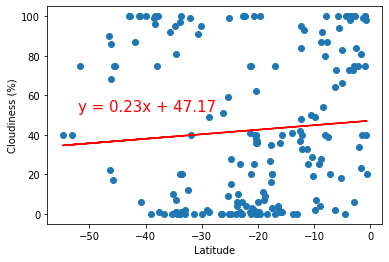

In [68]:
plt.scatter(south_hem_df["Latitude"], south_hem_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Cloudiness"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(-52,52),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.savefig("Southern Hemisphere - Cloudiness vs Latitude.png")

As shown with this graph, a clear correlation is not present.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04735092341275118


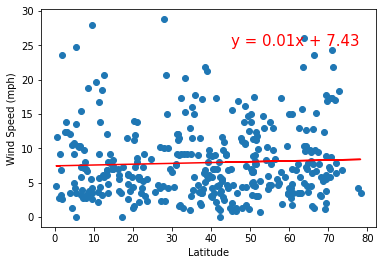

In [69]:
plt.scatter(north_hem_df["Latitude"], north_hem_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Wind Speed"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.savefig("Northern Hemisphere - Wind Speed vs Latitude.png")

This graph indicates that in the northern hemisphere, there is no clear correlation between latitude and wind speed. It can be iferred based on such a minimal slope that one can expect wind to average around 7.43mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14022594716701753


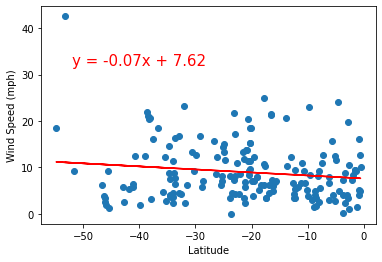

In [70]:
plt.scatter(south_hem_df["Latitude"], south_hem_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Wind Speed"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem_df["Latitude"],regress_values, "r-")
plt.annotate(line_eq,(-52,32),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.savefig("Southern Hemisphere - Wind Speed vs Latitude.png")

This graph is similar to the northern hemisphere graph in that the slope is very small, indicating that once again, the average wind speed tends to trend around 7.5mph. This graph does have a clear outlier which may skew the results.